In [190]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import sys
sys.path.append('/home/nibdombe/deep_eit/')
from data_processing.obj2py import read_get
from utils.helper import make_cmap
import matplotlib.pyplot as plt
from fnmatch import fnmatch
from reconstruction.resist import reconstruct
from tqdm import tqdm
import imageio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
case_dir = '/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01'
files = os.listdir(case_dir)
files = [os.path.join(case_dir, f) for f in files if f.endswith('.get')]
cmap = make_cmap()

rec_number = 5
level = 1
cut_thres = 4

In [3]:
for file in files:
    if fnmatch(file, f'*{str(rec_number).zfill(3)}_SF_{level}*'):
        data = read_get(file)
        data = data.reshape(143,-1)[:,:208]
        print(file)

/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01/KI_EIT_01_019_SF_1_U_top_I_top.get


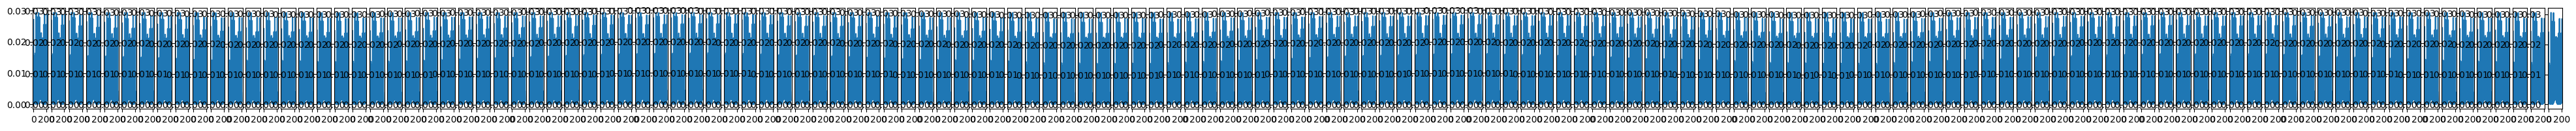

In [7]:
fig, axes = plt.subplots(1,data.shape[0],figsize=(50,2))
for n,d in enumerate(data):
    axes[n].plot(d)

In [8]:
min_idx = data.mean(axis=1).argmin()
max_idx = data.mean(axis=1).argmax()
print(min_idx, max_idx)

104 37


In [9]:
for level in [1,2,3]:
    for file in files:
        if fnmatch(file, f'*{str(rec_number).zfill(3)}_SF_{level}*'):
            data = read_get(file).reshape(143,-1)[:,:208]
            data_sort = data[data.mean(axis=1).argsort()]
            data_min = data_sort[:3].mean(axis=0)
            data_max = data_sort[-3:].mean(axis=0)
            np.save('/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01/expiration/level_'+str(level)+'.npy', data_min)
            np.save('/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01/inspiration/level_'+str(level)+'.npy', data_max)
            print(file)

/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01/KI_EIT_01_019_SF_1_U_top_I_top.get
/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01/KI_EIT_01_019_SF_2_U_mid_I_mid.get
/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01/KI_EIT_01_019_SF_3_U_bot_I_bot.get


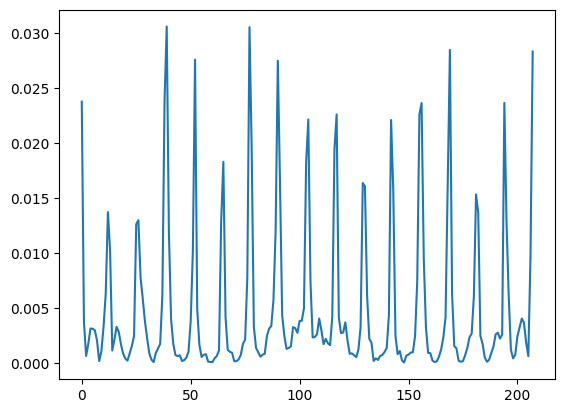

In [10]:
plt.plot(np.load('/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01/expiration/level_1.npy'))

# Use all frames

In [205]:
# parabula flights - 0g
case_dir = '/home/nibdombe/deep_eit/data/raw/case_real/Tag1'
# mri study
# case_dir = '/home/nibdombe/deep_eit/data/raw/case_real/Ki_EIT_01'
files = os.listdir(case_dir)
files = [os.path.join(case_dir, f) for f in files if (f.endswith('bot_372-459.get') or f.endswith('top_372-459.get') or f.endswith('mid_372-459.get'))]
# files = [os.path.join(case_dir, f) for f in files if f.endswith('.get')]
cmap = make_cmap()

signals = []
signals_levels = []
rec_number = 19

for file in files:
    for level in [1,2,3]:
        # if fnmatch(file, f'*{str(rec_number).zfill(3)}_SF_{level}*'):
        if fnmatch(file, f'*{str(rec_number).zfill(2)}_SF_{level}*'):
            print(file)
            signals.append(read_get(file).reshape(-1,256)[:,:208])
            signals_levels.append(level-1)
signals_levels = np.array(signals_levels).argsort()
data = np.array(signals)[signals_levels]
data = np.moveaxis(data,0,1)


/home/nibdombe/deep_eit/data/raw/case_real/Tag1/Tag_01_Msg_19_SF_2_U_mid_I_mid_372-459.get
/home/nibdombe/deep_eit/data/raw/case_real/Tag1/Tag_01_Msg_19_SF_3_U_bot_I_bot_372-459.get
/home/nibdombe/deep_eit/data/raw/case_real/Tag1/Tag_01_Msg_19_SF_1_U_top_I_top_372-459.get


In [209]:
reconstruction = []

for d in tqdm(data):
    reconstruction.append(reconstruct(d, n_zpos=3, axis='coronal', verbose=False, device='cpu').squeeze())

  1%|          | 1/88 [02:43<3:57:19, 163.68s/it]


KeyboardInterrupt: 

In [207]:
reconstruction_all = np.moveaxis(np.array(reconstruction).squeeze(), 0, 1)
reconstruction_level = reconstruction_all[1]
norm = plt.Normalize(vmin=0, vmax=0.7)
rgb_image = cmap(norm(reconstruction_level))

In [208]:
# save the sequence of frames as a GIF
imageio.mimsave('animation.gif', (rgb_image[:,:,:,:3]*255).astype(np.uint8), fps=6.6) 